In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
path = os.getcwd() + '/dane1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

## Ex 1

In [3]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


## Ex 2

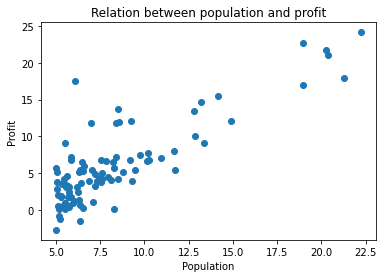

In [5]:
plt.scatter(data.Population, data.Profit)
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Relation between population and profit')
plt.show()

## Ex 3

In [6]:
data.insert(loc=0, column='Cost', value=1, allow_duplicates=False)
data.head()

,Cost,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


## Ex 4

In [7]:
X = data[['Cost', 'Population']]
X.head()

,Cost,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [8]:
y = data.Profit
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit, dtype: float64

In [9]:
X = np.matrix(X.values, dtype=np.float64).transpose()
y = np.matrix(y.values, dtype=np.float64)
theta = np.matrix(np.array([0,0]), dtype=np.float64)

## Ex 6

In [10]:
def computeCost(X, y, theta):
    return np.sum(np.power(np.dot(theta, X) - y, 2))/(2*X.shape[1])

## Ex 7

In [11]:
computeCost(X, y, theta)

32.072733877455676

## Ex 8

In [12]:
alpha = 0.01
it = 1000

In [13]:
def gradientDescent (X, y, theta, alpha, iterations):
    cost = []
    for it in range(iterations):
        hypothesis = theta.dot(X)
        for i in range(theta.size):
            theta[0, i] = float(theta[0, i] - alpha*(1/y.shape[1])*np.sum((hypothesis - y).dot(np.transpose(X[i]))))
        cost.append(computeCost(X, y, theta))
    return theta, cost

In [14]:
theta_res = gradientDescent(X, y, theta, alpha, it)[0]
cost = gradientDescent(X, y, theta, alpha, it)[1]

## Ex 9 

In [15]:
theta_res

matrix([[-3.78806857,  1.18221277]])

## Ex 10

In [16]:
cost[-1]

4.478027609879971

## Ex 11

In [17]:
#predicted values
predY = theta_res * X

In [18]:
# For plotting purposes only
X = np.squeeze(np.asarray(X[1]))
y = np.squeeze(np.asarray(y))
predY = np.squeeze(np.asarray(predY))

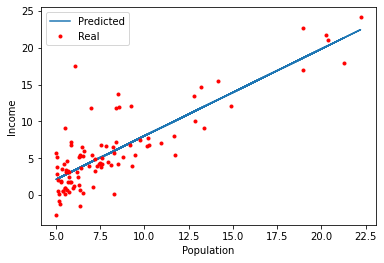

In [19]:
plt.plot(X, predY, X, y, 'r.')
plt.xlabel('Population')
plt.ylabel('Income')
plt.legend(['Predicted', 'Real'])
plt.show()

## Ex 12

In [20]:
iterations = range(it)
costVal = np.squeeze(np.asarray(cost))

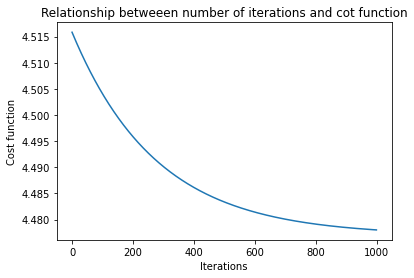

In [21]:
plt.plot(iterations, costVal)
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.title('Relationship betweeen number of iterations and cot function')
plt.show()

# Linear regression with multiple variables

In [22]:
path = os.getcwd() + '/dane2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])


data2Bak = data2.copy()
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [23]:
data2.Bedrooms = (data2.Bedrooms - data2.Bedrooms.mean()) / data2.Bedrooms.std()
data2.Size = (data2.Size - data2.Size.mean()) / data2.Size.std()
data2.Price = (data2.Price - data2.Price.mean()) / data2.Price.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


## Ex 3

In [24]:
data2.insert(loc=0, column='Cost', value=1, allow_duplicates=False)

## Ex 4

In [25]:
X = data2[['Cost', 'Size', 'Bedrooms']]
X.head()

,Cost,Size,Bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [26]:
y = data2.Price
y.head()

0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: Price, dtype: float64

In [27]:
X = np.matrix(X.values, dtype=np.float64).transpose()
y = np.matrix(y.values, dtype=np.float64)
theta = np.matrix(np.array([0,0,0]), dtype=np.float64)

## Ex 7

In [28]:
computeCost(X, y, theta)

0.4893617021276595

In [29]:
theta_res = gradientDescent(X, y, theta, alpha, it)[0]
cost = gradientDescent(X, y, theta, alpha, it)[1]

## Ex 9 

In [30]:
theta_res

matrix([[-1.10833328e-16,  8.84682367e-01, -5.30951990e-02]])

## Ex 10

In [31]:
cost[-1]

0.13068648355046528

## Ex 11

In [32]:
xdata = np.linspace(-3,3,1000)
ydata = np.linspace(-3,3,100)
X,Y = np.meshgrid(xdata,ydata)

In [33]:
Z = theta_res[0, 0] + X * theta_res[0, 1] + Y * theta_res[0, 2]

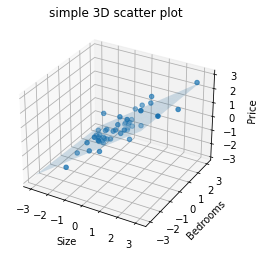

In [36]:
# Create the figure
fig = plt.figure()

# Add an axes
ax = fig.add_subplot(111,projection='3d')

# plot the surface
ax.plot_surface(X, Y, Z, alpha=0.2)

# and plot the point 
ax.scatter(data2.Size, data2.Bedrooms, data2.Price)
plt.title("simple 3D scatter plot")
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
 
# show plot
plt.show()